In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install tensorflow -q
!pip install opendatasets -q


ERROR: Could not find a version that satisfies the requirement matpotlib (from versions: none)
ERROR: No matching distribution found for matpotlib


In [2]:
!pip install matplotlib -q


In [4]:
#import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

# use to download kaggle data set
import opendatasets as od

### Download Data set

In [5]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sathiskasasindu
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:01<00:00, 126MB/s]


In [95]:
# define batch size
BATCH_SIZE = 32

# #define image shape
IMAGE_SIZE = (128,128)

In [97]:
# Load our test data and train data

train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [98]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,

    # devide our training data set
    subset = 'training',
    validation_split = 0.1,
    seed = 42

    )

validation_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,

    # devide our training data set
    subset = 'validation',
    validation_split = 0.1,
    seed = 42

    )


test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE
    )

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [99]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [100]:
# take one batch
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


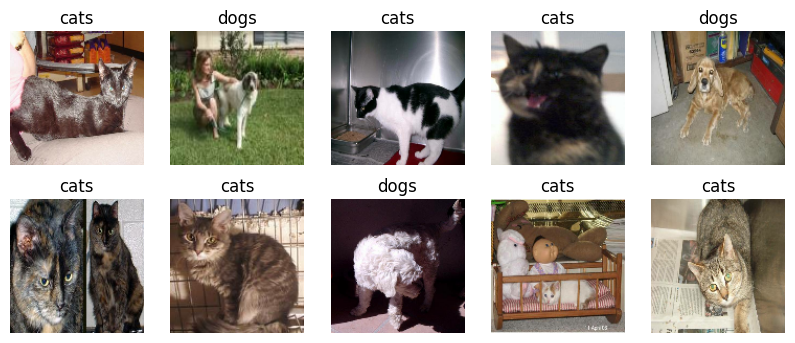

In [101]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [102]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [103]:
# Normalize our data set
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

### After Normalization

In [104]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

### Data Augmentation

In [105]:
# Data Augmentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

### Model Building

In [122]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3 , activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3 , activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

#  add convolutional layer
model.add(tf.keras.layers.Conv2D(128,kernel_size=3 , activation='relu'))

# add pooling layer
model.add(tf.keras.layers.MaxPooling2D())

# add dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Batch normalization
model.add(tf.keras.layers.BatchNormalization())

# create flatten layer
# It use to convert multidimension array -> one dimensional array
model.add(tf.keras.layers.Flatten())

# hiddene layer
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

# output layer
# Here we do binary classification task.therefore we use sigmoid activation function.
# I we have more than one input then we can use softmax activation function
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [123]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)      

### Compile the model

In [124]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

### Train the model

In [125]:
start_time = time.time()

history = model.fit(
    train_data,
    epochs = 20,
    validation_data = validation_data
)

end_time = time.time()

Epoch 1/20
225/225 [==============================] - 13s 44ms/step - loss: 0.6772 - accuracy: 0.5653 - val_loss: 0.7033 - val_accuracy: 0.5487
Epoch 2/20
225/225 [==============================] - 9s 37ms/step - loss: 0.6533 - accuracy: 0.6124 - val_loss: 0.9278 - val_accuracy: 0.5362
Epoch 3/20
225/225 [==============================] - 10s 44ms/step - loss: 0.6255 - accuracy: 0.6528 - val_loss: 0.6430 - val_accuracy: 0.6187
Epoch 4/20
225/225 [==============================] - 11s 47ms/step - loss: 0.6127 - accuracy: 0.6587 - val_loss: 0.6240 - val_accuracy: 0.6875
Epoch 5/20
225/225 [==============================] - 9s 39ms/step - loss: 0.5988 - accuracy: 0.6771 - val_loss: 0.7752 - val_accuracy: 0.5638
Epoch 6/20
225/225 [==============================] - 10s 42ms/step - loss: 0.5783 - accuracy: 0.6958 - val_loss: 0.5642 - val_accuracy: 0.7038
Epoch 7/20
225/225 [==============================] - 10s 44ms/step - loss: 0.5639 - accuracy: 0.7010 - val_loss: 0.5524 - val_accuracy: 0

In [126]:
history.history

{'loss': [0.6771978139877319,
  0.6532647013664246,
  0.6255003809928894,
  0.6127077341079712,
  0.5988470911979675,
  0.5782939195632935,
  0.5639002323150635,
  0.5579464435577393,
  0.5420140027999878,
  0.5313239693641663,
  0.5232893228530884,
  0.513268768787384,
  0.49983224272727966,
  0.4816519021987915,
  0.4750864803791046,
  0.4637094736099243,
  0.4614923894405365,
  0.4471738338470459,
  0.4478110373020172,
  0.4238699674606323],
 'accuracy': [0.5652777552604675,
  0.6123611330986023,
  0.6527777910232544,
  0.6587499976158142,
  0.6770833134651184,
  0.6958333253860474,
  0.7009721994400024,
  0.715833306312561,
  0.7212499976158142,
  0.7320833206176758,
  0.7379166483879089,
  0.7484722137451172,
  0.7545833587646484,
  0.7686111330986023,
  0.7651388645172119,
  0.7787500023841858,
  0.7805555462837219,
  0.7829166650772095,
  0.7851389050483704,
  0.8009722232818604],
 'val_loss': [0.703349232673645,
  0.9278022050857544,
  0.6429646015167236,
  0.6240228414535522,


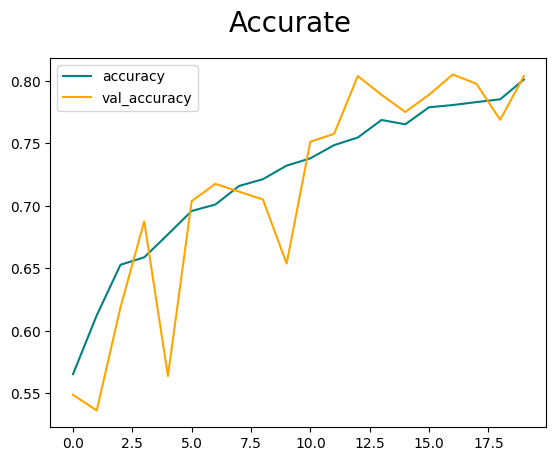

In [127]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accurate',fontsize=20)
plt.legend()
plt.show()

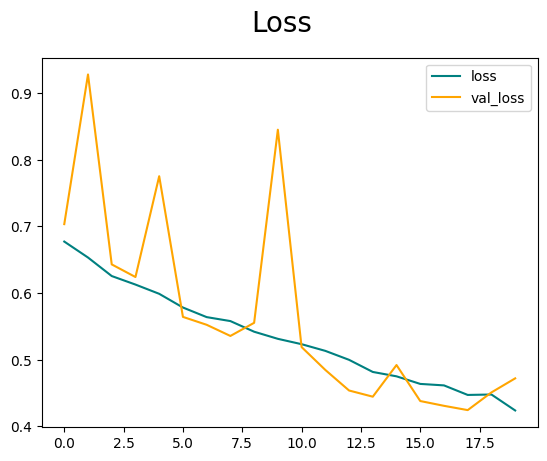

In [128]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal',label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend()
plt.show()

### Evaluate the Model

In [129]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [130]:
for batch in test_data.as_numpy_iterator():
  # x - images , y - labels
  x,y = batch


  yhat = model.predict(x)

  # compare
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

1/1 [==============================] - 0s 103ms/step


In [131]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.79050565>

In [133]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.766>

In [134]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7815>

In [135]:
!pip install opencv-python

In [136]:
import cv2

### Load The Image

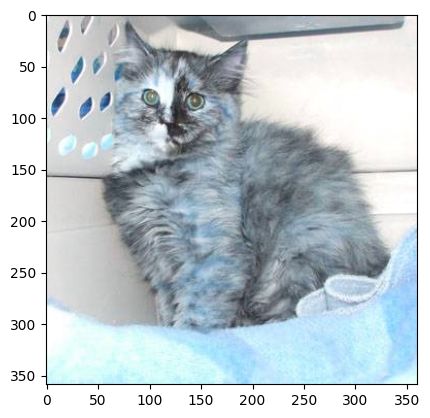

In [137]:
image = cv2.imread("/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4005.jpg")
plt.imshow(image)
plt.show()

In [138]:
# resize the image
resized_image = tf.image.resize(image,IMAGE_SIZE)
scaled_image = resized_image/255

In [139]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.9844966 , 0.98841816, 0.980575  ],
        [0.87435615, 0.8782777 , 0.8704346 ],
        [0.86140376, 0.86532533, 0.8574822 ],
        ...,
        [0.99798226, 0.9802543 , 0.9684896 ],
        [0.99364275, 0.9742503 , 0.9624856 ],
        [0.9922593 , 0.97372854, 0.96196383]],

       [[0.97274625, 0.9766678 , 0.9688247 ],
        [0.86573654, 0.8696581 , 0.861815  ],
        [0.86810184, 0.8720234 , 0.86418027],
        ...,
        [0.969761  , 0.95431983, 0.9404718 ],
        [0.9650108 , 0.945403  , 0.9336383 ],
        [0.96282166, 0.9432138 , 0.9314491 ]],

       [[0.95718634, 0.96074027, 0.9532648 ],
        [0.87335515, 0.8772767 , 0.8694336 ],
        [0.86081785, 0.8647394 , 0.8568963 ],
        ...,
        [0.94710475, 0.9295803 , 0.9219822 ],
        [0.95232844, 0.9327206 , 0.9209559 ],
        [0.96214336, 0.9425355 , 0.9307708 ]],

       ...,

       [[0.80201536, 0.9562151 , 0.96616113],
        [0.82

In [140]:
np.expand_dims(scaled_image , 0).shape

(1, 128, 128, 3)

### Get The Model Prediction

In [141]:
y_hat = model.predict(np.expand_dims(scaled_image , 0))

1/1 [==============================] - 0s 27ms/step


In [142]:
y_hat

array([[0.1129083]], dtype=float32)

In [143]:
class_names

['cats', 'dogs']

### Print The Model Prediction

In [144]:
if y_hat >= 0.5:
  print(class_names[1])
else:
   print(class_names[0])

cats
